In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
import statsmodels.formula.api as sm 

%matplotlib inline

In [3]:
housing = pd.read_csv('Housing Dataset.csv')

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- 1460 houses in the dataset, majority of columns are fairly complete
- Many of the features describe physical attributes of each home, for the purpose of statistical inference it might be ok to ignore these house-specific features and look at broader things like neighbourhood, overall condition, timeseries aspects
- Sales Price is the dependent variable here, ultimately the target of any predictive model we make

In [5]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- Mean is higher than median for sales price, indicating slight postive skew with outliers

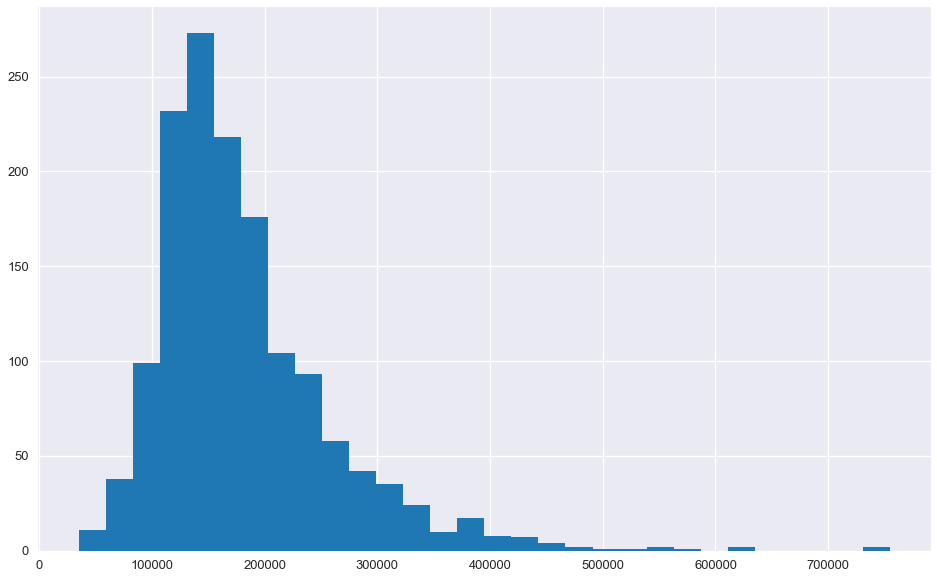

In [6]:
plt.figure(figsize=(16,10))

housing['SalePrice'].hist(bins=30)

- Histogram indicates right skewed distribution

## Timeseries Analysis

Looking at Date Sold, Date Built

- When were the houses in neighbourhoods built? Perhaps this could uncover some of the history of Boston's development
- Quality of house when sold vs original time it was built
- Age of a house before it's sold
- When in the year are most houses sold? Any trends that could be useful to realtors?
- Gentrifying? What neighbourhoods are on the rise?

### Date Sold

In [7]:
housing[['MoSold', 'YrSold']].head()

,MoSold,YrSold
0,2,2008
1,5,2007
2,9,2008
3,2,2006
4,12,2008


In [8]:
import datetime

In [9]:
def date_sold(row):
    """combines MoSold and YrSold into a single date attribute"""
    y = row.YrSold
    m = row.MoSold
    datetime_obj = datetime.datetime.strptime("{} {}".format(m,y), "%m %Y")
    return datetime_obj

In [10]:
date_sold(housing.iloc[1])

datetime.datetime(2007, 5, 1, 0, 0)

In [11]:
housing['DateSold'] = housing.apply(date_sold, axis=1)

In [12]:
housing.DateSold.head()

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: DateSold, dtype: datetime64[ns]

In [13]:
housing_ts = housing.set_index(pd.DatetimeIndex(housing.DateSold))
housing_ts.reindex()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DateSold
DateSold,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01
2007-05-01,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01
2008-09-01,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01
2006-02-01,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01
2008-12-01,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01
2009-10-01,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,2009-10-01
2007-08-01,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,2007-08-01
2009-11-01,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,2009-11-01
2008-04-01,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,2008-04-01


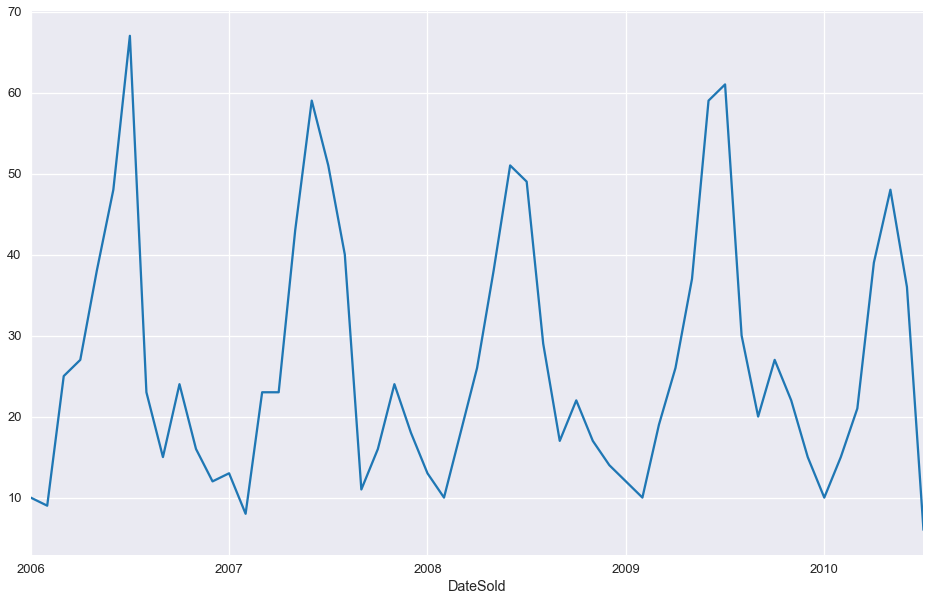

In [14]:
plt.figure(figsize=(16,10))

housing_ts.resample('M').Id.count().plot()

- Very clear indication of seasonality when it comes to housing sales, most houses are sold during the middle of the year

In [15]:
housing_ts.groupby(['MoSold']).count().Id.sort_values(ascending=False)

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: Id, dtype: int64

- May, June, July (Months 5,6,7) are when most houses get sold
- The beginning/end of each year are when the least houses are sold

### Year Built, House Age

- Which neighbourhoods grew over time? (houses built)

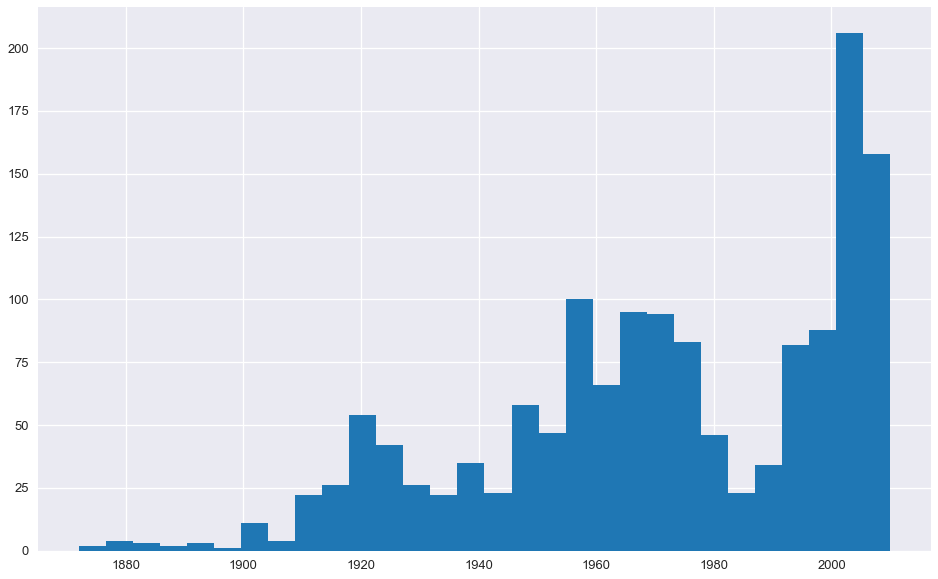

In [16]:
plt.figure(figsize=(16,10))

housing_ts['YearBuilt'].hist(bins=30)

- Distribution of houses built is multimodal, peaks in the 1960s-80s and 1990s-2000s
- What caused these spurs of development over time?
- Periods of economic growth/stagnation in Boston?

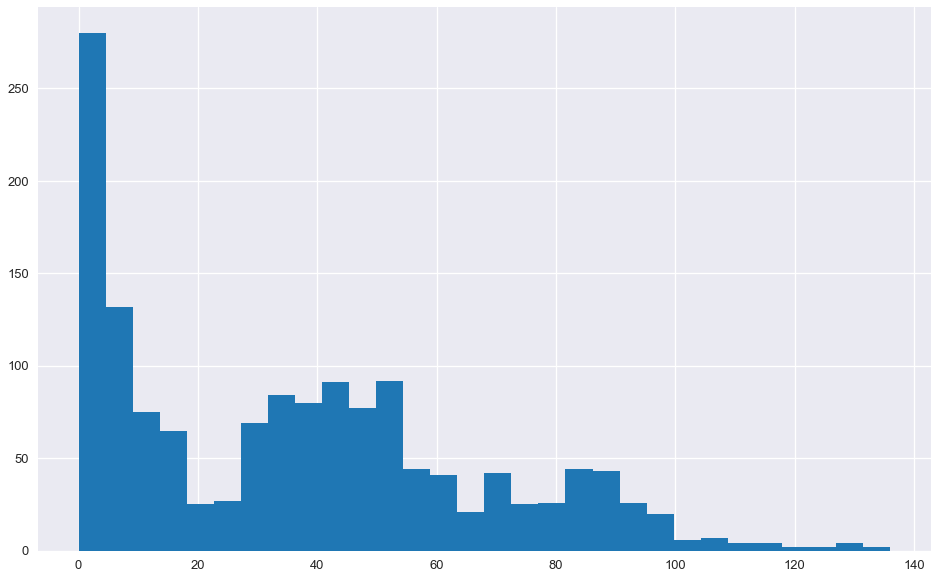

In [17]:
housing_ts['HouseAge'] = housing_ts.YrSold - housing_ts.YearBuilt

plt.figure(figsize=(16,10))
housing_ts.HouseAge.hist(bins=30)

- Somewhat exponential distribution of housing ages before they're sold
- Most of the houses sold are very new, but there's a good portion that get sold after they're 20-60 years old
- Could do statistical inference here to find parameters for exponential distribution of housing ages, using MCMC/PyMC3 model
- Is there a correlation b/w house age and house condition at time of sale?
- Look into year of Remodeling too

Text(0.5,0,'Age in Years at Time of Sale')

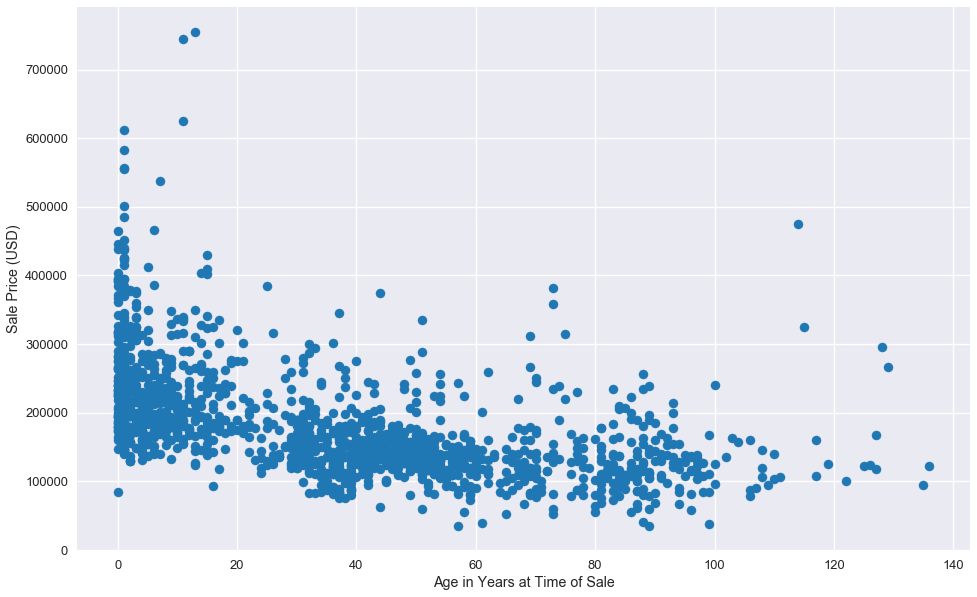

In [18]:
plt.figure(figsize=(16,10))

plt.scatter(housing_ts.HouseAge, housing_ts.SalePrice)
plt.ylabel("Sale Price (USD)")
plt.xlabel("Age in Years at Time of Sale")

In [19]:
housing_ts[['HouseAge', 'SalePrice']].corr()

,HouseAge,SalePrice
HouseAge,1.00000,-0.52335
SalePrice,-0.52335,1.00000


- Moderate negative relationship between Sale Price and age of house at time of sale

### The growth of different neighbourhoods over time

- Lets see the rates at which houses were built in each of Boston's neighbourhoods

In [20]:
housing_ts.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Change neighborhood abbreviations to actual names

In [21]:
neighbourhood_names = {
    "Blmngtn": "Bloomington Heights",
    "Blueste": "Bluestem",
    "BrDale": "Briardale",
    "BrkSide": "Brookside",
    "ClearCr": "Clear Creek",
    "CollgCr": "College Creek",
    "Crawfor": "Crawford",
    "Edwards": "Edwards",
    "Gilbert": "Gilbert",
    "IDOTRR": "Iowa DOT and Rail Road",
    "MeadowV": "Meadow Village",
    "Mitchel": "Mitchell",
    "NAmes": "North Ames",
    "NoRidge": "Northridge",
    "NPkVill": "Northpark Villa",
    "NridgHt": "Northridge Heights",
    "NWAmes": "Northwest Ames",
    "OldTown": "Old Town",
    "SWISU": "South & West of Iowa State University",
    "Sawyer": "Sawyer",
    "SawyerW": "Sawyer West",
    "Somerst": "Somerset",
    "StoneBr": "Stone Brook",
    "Timber": "Timberland",
    "Veenker": "Veenker"
}

housing_ts.Neighborhood = housing_ts.Neighborhood.apply(lambda x: neighbourhood_names[x])

- First let's see the size of different neighbourhoods

Text(0.5,0,'# of Houses')

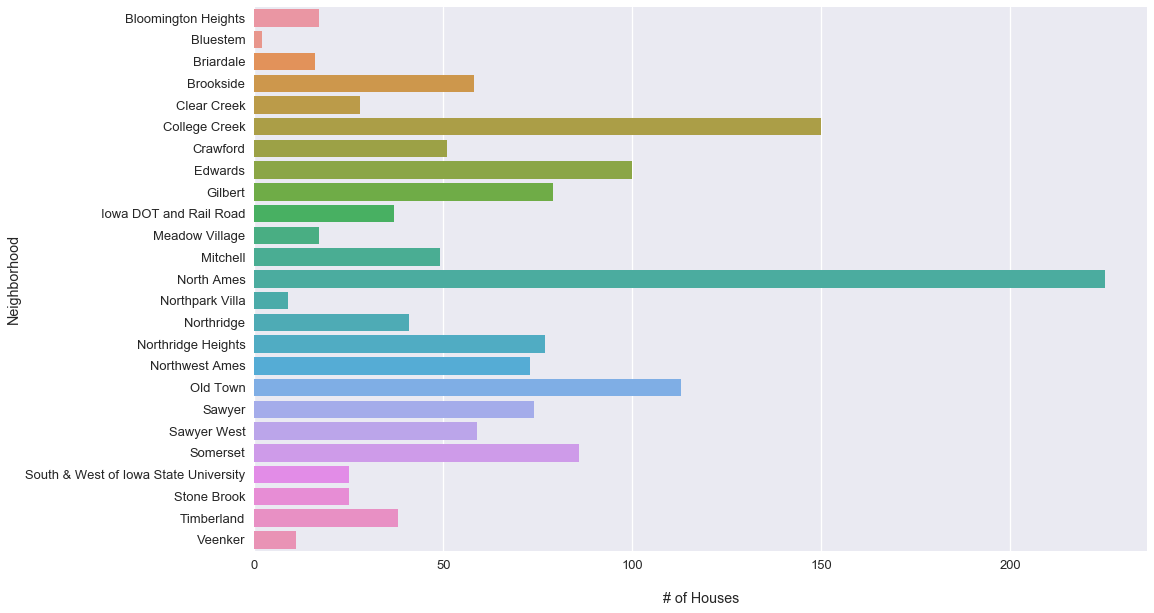

In [22]:
neighbourhood_size = housing_ts.groupby('Neighborhood').Id.count()

plt.figure(figsize=(16,10))
sns.barplot(y=neighbourhood_size.index, x=neighbourhood_size)
plt.xlabel("# of Houses", labelpad=20)

- North Ames, College Creek, Old Town have the most houses

Let's also check the median sale price per neighbourhood:

Text(0.5,0,'Median Sale Price')

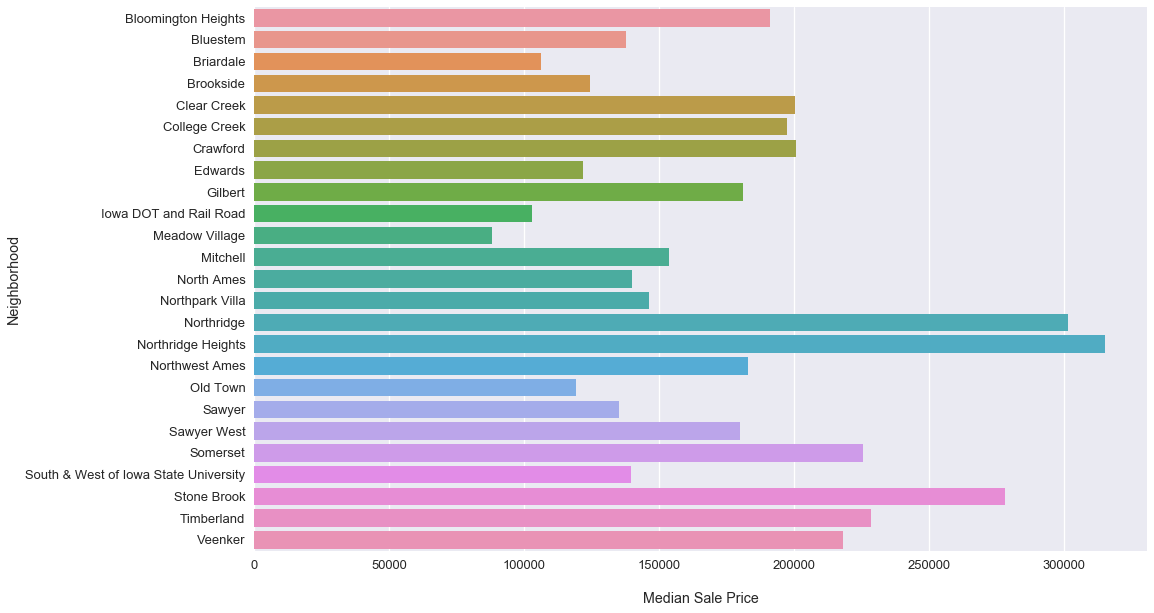

In [23]:
neighbourhood_median_price = housing_ts.groupby('Neighborhood').SalePrice.median()

plt.figure(figsize=(16,10))
sns.barplot(y=neighbourhood_median_price.index, x=neighbourhood_median_price)
plt.xlabel("Median Sale Price", labelpad=20)

- Northridge area seems to be the pricey part of town, with Stone Brook, Timberland, Somerset, and Veenker following up
- Meadow Village and Iowa DOT seem to be cheap parts

Moving onto the number of houses built in each area over time:

In [24]:
housing_ts.YearBuilt = housing_ts.YearBuilt.apply(lambda x: datetime.datetime.strptime(str(x), '%Y'))

In [25]:
housing_built_ts = housing_ts.set_index(pd.DatetimeIndex(housing_ts.YearBuilt))
housing_built_ts.reindex()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DateSold,HouseAge
YearBuilt,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01,5
1976-01-01,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01,31
2001-01-01,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01,7
1915-01-01,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01,91
2000-01-01,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01,8
1993-01-01,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,Shed,700,10,2009,WD,Normal,143000,2009-10-01,16
2004-01-01,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,307000,2007-08-01,3
1973-01-01,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Shed,350,11,2009,WD,Normal,200000,2009-11-01,36
1931-01-01,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2008,WD,Abnorml,129900,2008-04-01,77


In [26]:
palette = ["#a14a77",
"#62bf4b",
"#9f56c7",
"#a1b837",
"#5e6ed9",
"#c0ab39",
"#d055b6",
"#4dc381",
"#dd4b85",
"#508f36",
"#c98fd2",
"#dc9636",
"#5e99d5",
"#ca5e2b",
"#43c4c4",
"#d43e41",
"#5bae8a",
"#a74949",
"#33784a",
"#745fa2",
"#a7b26b",
"#e28085",
"#697329",
"#da9669",
"#91692d"]

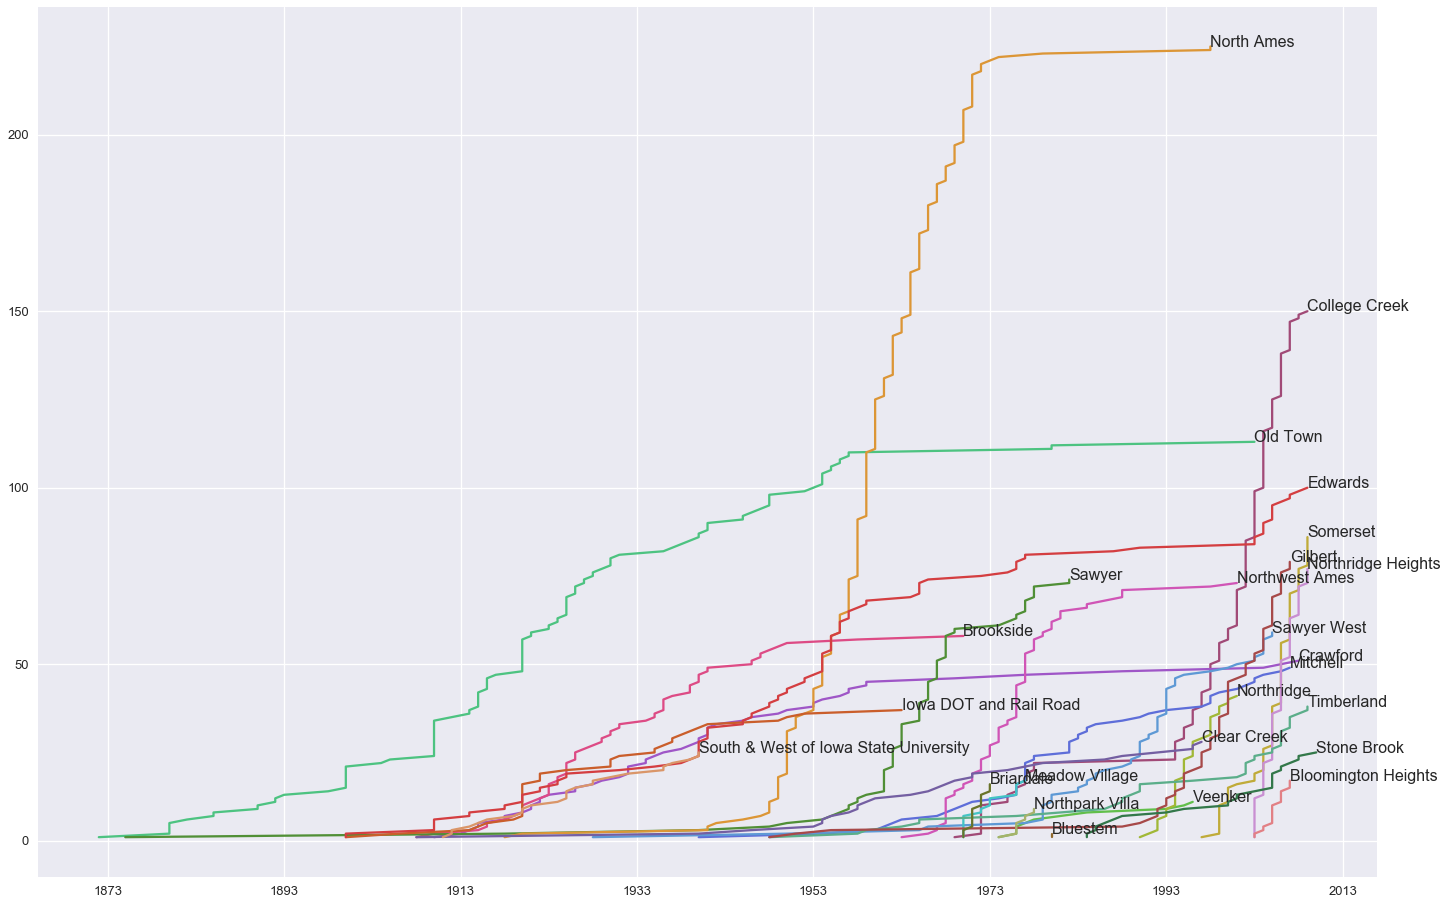

In [27]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(24, 16))

for neighbourhood, color in zip(housing_built_ts.Neighborhood.unique(), palette):
    neighbourhood_data = housing_built_ts[housing_built_ts.Neighborhood == neighbourhood]
    neighbourhood_data['Count'] = 1
    houses_cumsum = neighbourhood_data.sort_index().Count.cumsum()
    plt.plot(houses_cumsum.index, houses_cumsum.values, label=neighbourhood, c=color)
    plt.annotate(neighbourhood, (houses_cumsum.index[-1], houses_cumsum.values[-1]), fontsize=16)

#plt.legend()
    

In [28]:
neighbourhoods = housing_ts.pivot_table(index='Neighborhood', values=['SalePrice'])

In [29]:
neighbourhoods['Size'] = neighbourhood_size

In [30]:
neighbourhoods

,SalePrice,Size
Neighborhood,,
Bloomington Heights,194870.882353,17
Bluestem,137500.000000,2
Briardale,104493.750000,16
Brookside,124834.051724,58
Clear Creek,212565.428571,28
College Creek,197965.773333,150
Crawford,210624.725490,51
Edwards,128219.700000,100
Gilbert,192854.506329,79


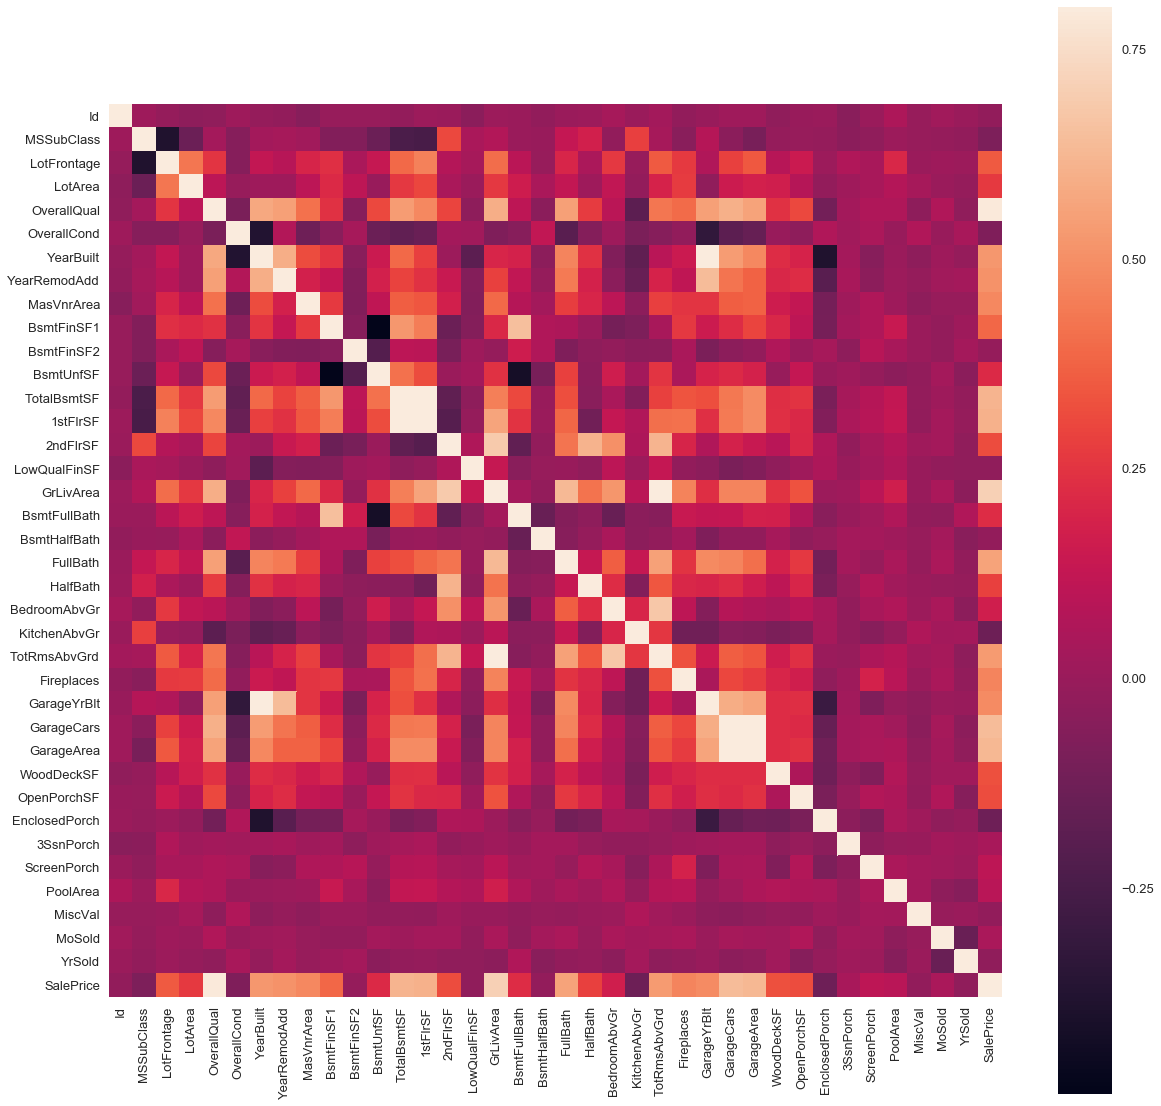

In [31]:
#correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8,square=True)

From the correlation heatmap we can see some signs of multi-collinearity between 'TotalBsmtSF','1stFlrSF' and '2ndFlrSF' and between the 'GarageX' variables. They show significant correlation between them. It comes to show that the variables are giving us the exact same information.

Next lets look at the 10 largest variables that are correlated with SalePrice

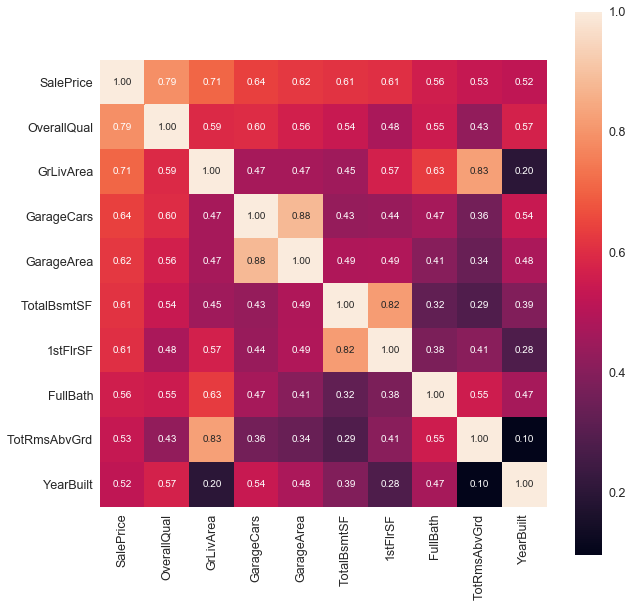

In [45]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)



Now looking at this correalation heat map we can straight away see the most correlated variables with SalePrice. A few things to note like mentioned above are that 'TotalBsmtSF' and '1stFlrSF' are highly correlated with each other. Other factors that are highly correlated with each other include 'GarageCars', 'GarageArea', 'GrLivArea' and 'TotRmsAbvGrd'. This indicates multi-collinearity in our independenst variables. We can drop the factors that are least related to our target SalePrice. 

1) OverallQual

2) GrLivArea

3) GarageCars

4) TotalBsmtSF

5) FullBath 

6) YearBuilt

# OLS regression

In [52]:
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','SalePrice']
housing_reg_data = housing[cols]

In [53]:
housing_reg_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,1710,2,856,2,2003,208500
1,6,1262,2,1262,2,1976,181500
2,7,1786,2,920,2,2001,223500
3,7,1717,3,756,1,1915,140000
4,8,2198,3,1145,2,2000,250000


In [54]:
ols_regression = sm.ols(formula = 'SalePrice ~ OverallQual+GrLivArea+GarageCars+TotalBsmtSF+FullBath+YearBuilt',data=housing_reg_data).fit()
ols_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     804.6
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:44:04   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.377e+05   9.05e+04     -8.154      0.000   -9.15e+05    -5.6e+05
OverallQual  2.052e+04   1156.785     17.739      0.000    1.83e+04    2.28e+04
GrLivArea      54.0758      3.000     18.024      0.000      48.191      59.961
GarageCars   1.465e+04   1822.657      8.036      0.000    1.11e+04    1.82e+04
TotalBsmtSF    29.1821      2.843     10.263      0.000      23.605      34.760
FullBath    -5503.9737   2650.906     -2.076      0.038   -1.07e+04    -303.962
YearBuilt     336.5467     47.643      7.064      0.000     243.091     430.002
==============================================================================
Omnibus:                      458.824   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49948.644
Skew:                          -0.372   Prob(JB):                         0.00
Kurtosis:                      31.645   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""